3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("bank-additional-full.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape


(41188, 21)

In [6]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [7]:
df.dtypes


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [8]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [9]:
df.duplicated().sum()

12

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [12]:
catg_columns = df.select_dtypes(include='object').columns
print(catg_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


In [13]:
num_columns = df.select_dtypes(include = 'object').columns
print(num_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


<function matplotlib.pyplot.show(close=None, block=None)>

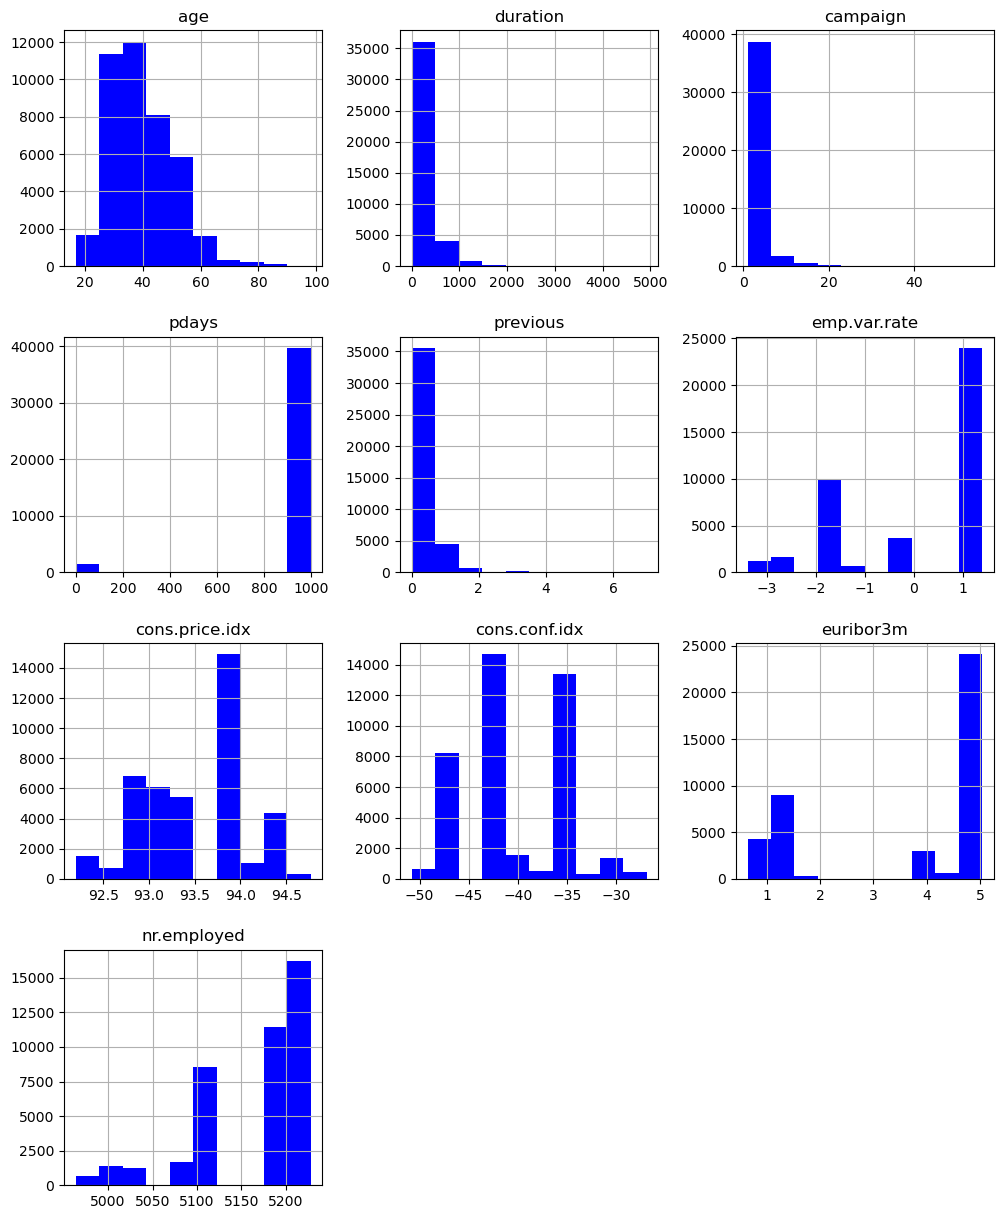

In [16]:
df.hist(figsize=(12,15), color = 'blue')
plt.show

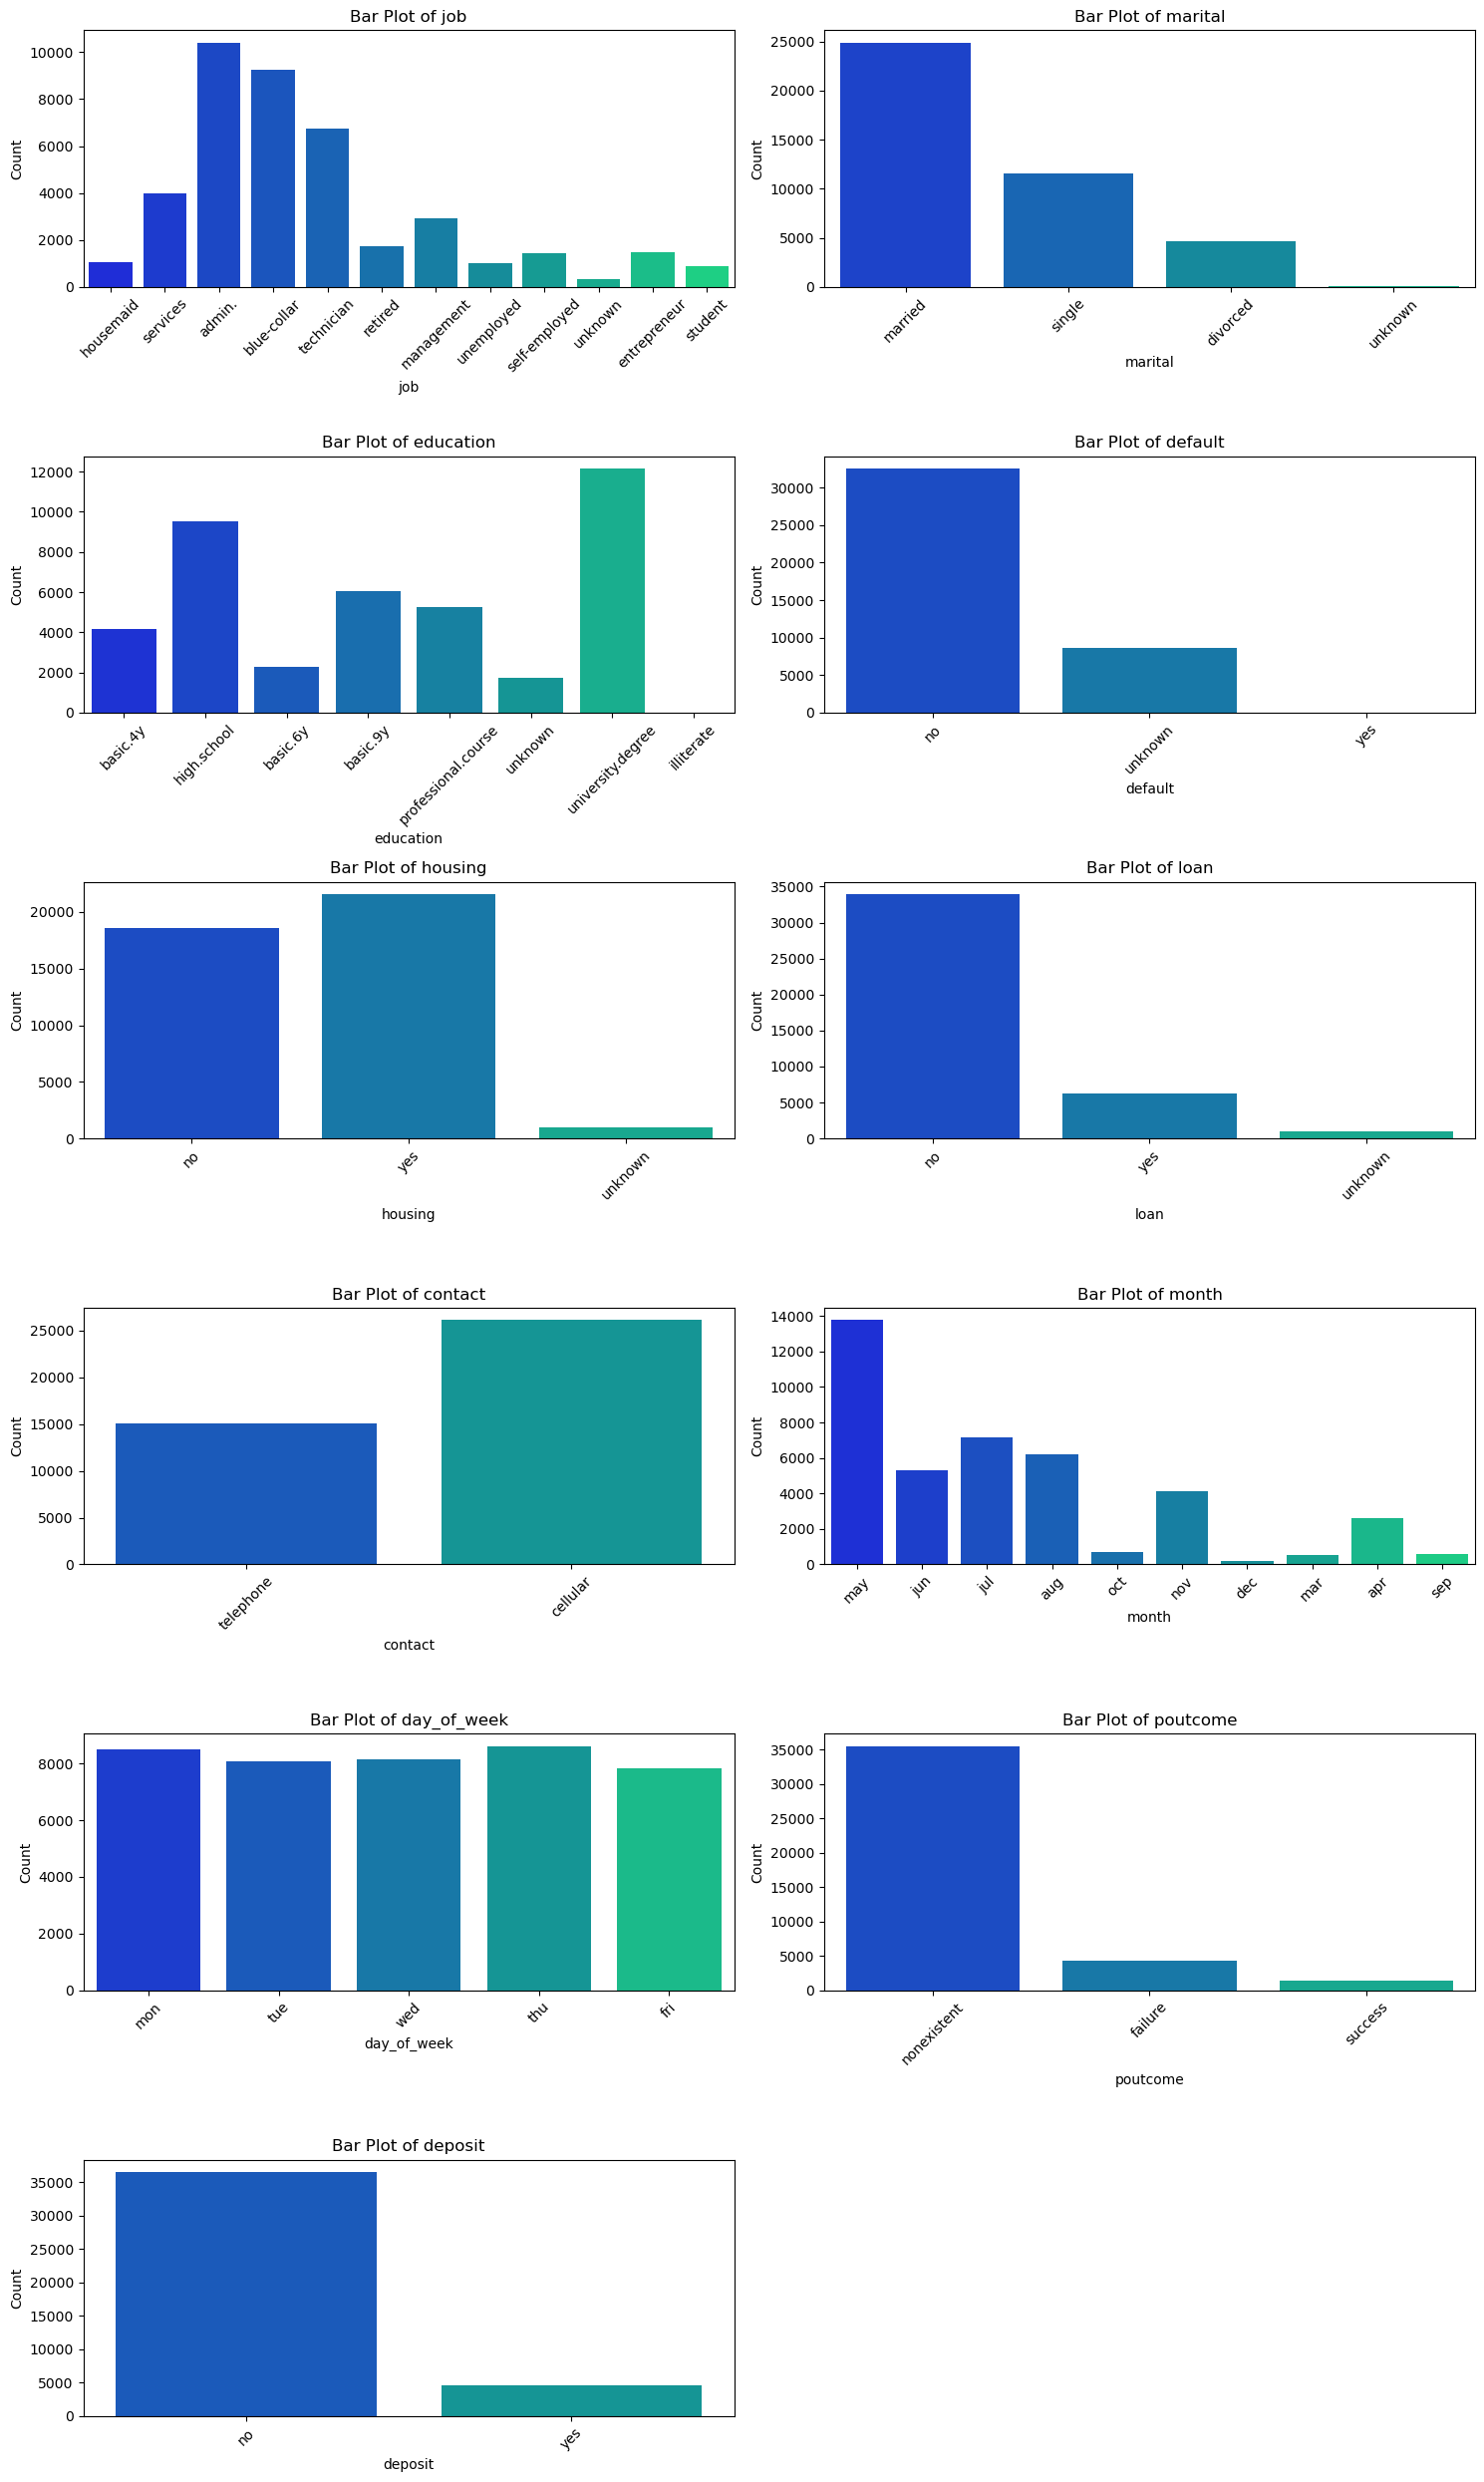

In [45]:
# Calculate the number of rows and columns for subplots
num_plots = len(catg_columns)
num_rows = (num_plots + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
num_cols = 2

# Create a new figure
plt.figure(figsize=(15,25))  # Adjust the figure size as needed

# Loop through each feature and create a countplot
for i, feature in enumerate(catg_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='winter')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

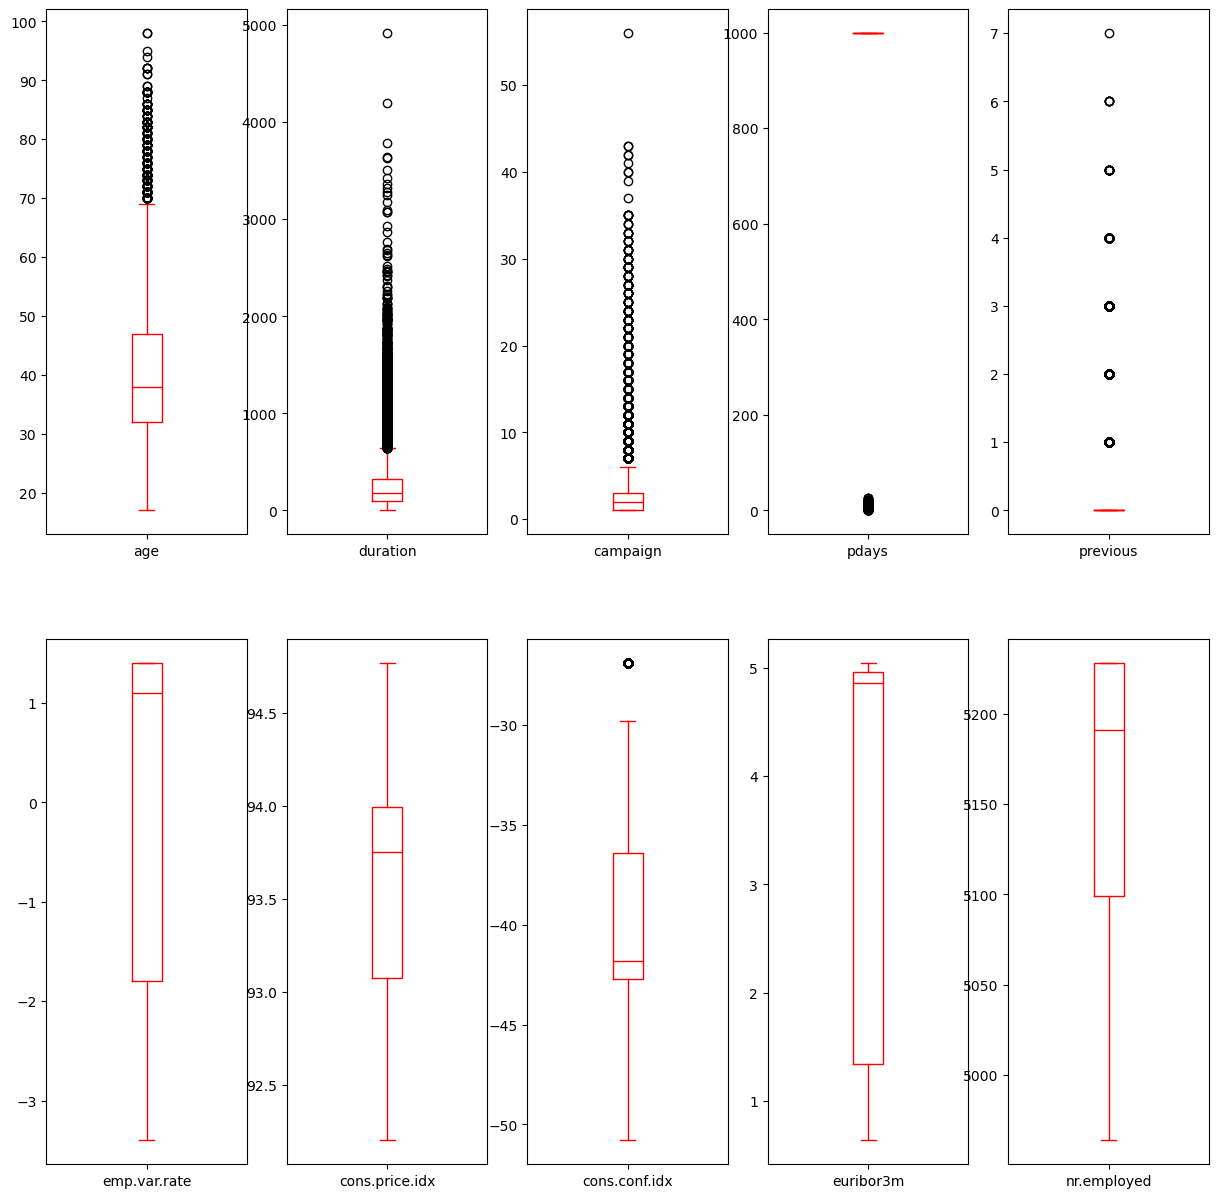

In [18]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(15,15),color='Red')
plt.show()

In [19]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

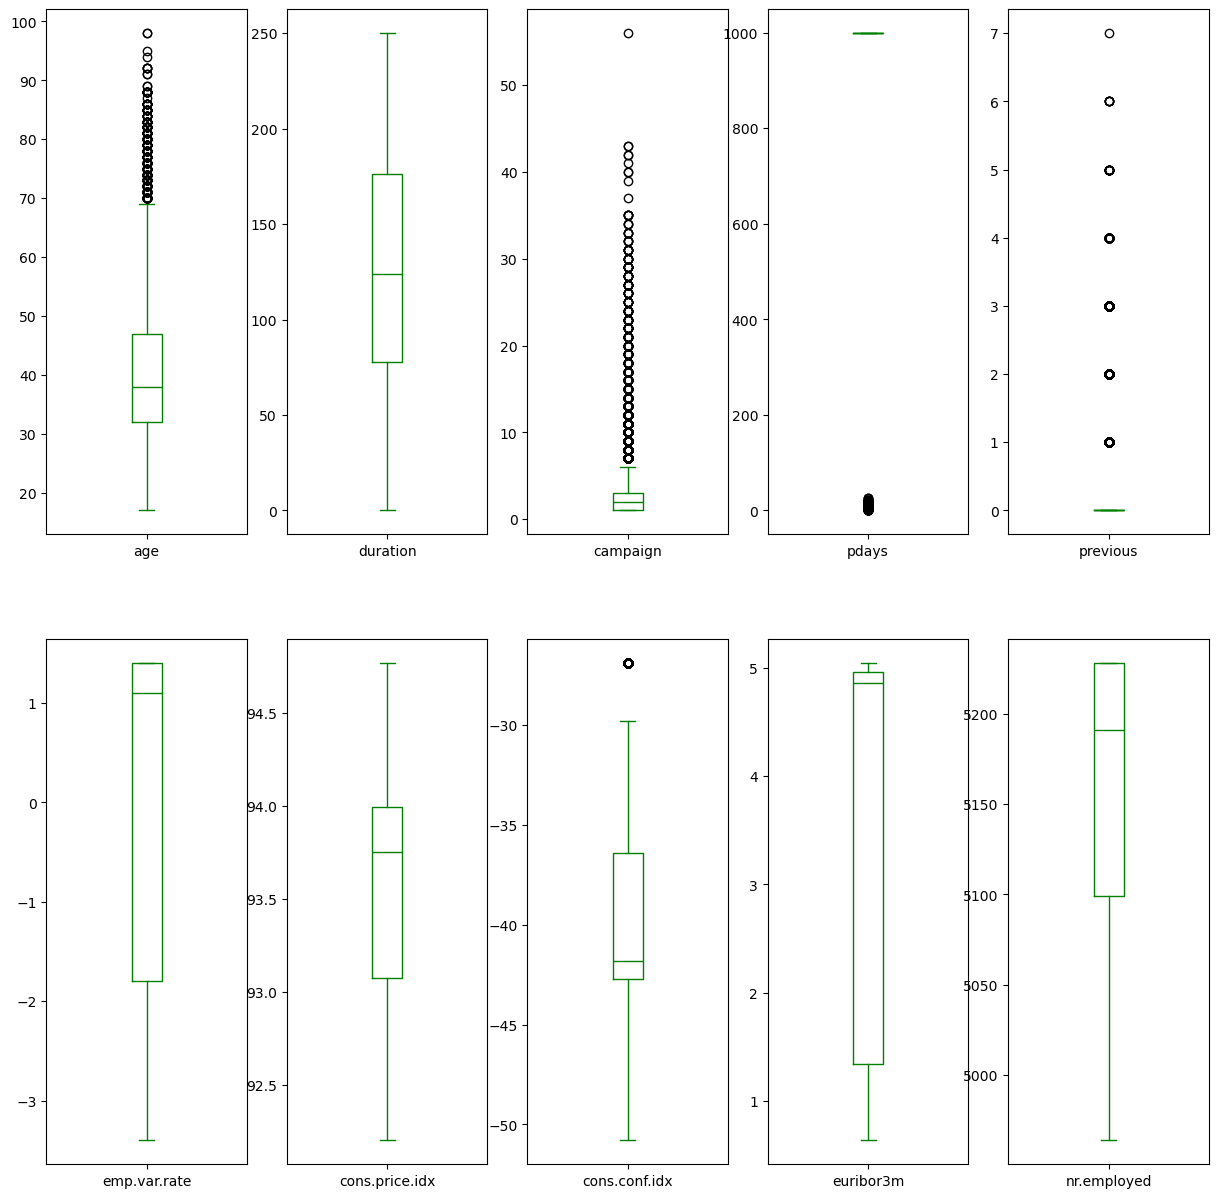

In [20]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(15,15),color='green')
plt.show()

In [21]:
numeric_df = df.drop(columns = catg_columns)

corr = numeric_df.corr()
print(corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.009279  0.004622 -0.034381  0.024379   
duration        0.009279  1.000000 -0.203856 -0.082724  0.064901   
campaign        0.004622 -0.203856  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.082724  0.052606  1.000000 -0.587508   
previous        0.024379  0.064901 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.042452  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009 -0.008305  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075  0.060765 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.043426  0.135169  0.296946 -0.454571   
nr.employed    -0.017607 -0.074771  0.144129  0.372659 -0.501411   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.042452       -0.008305       0.060765  -0.043426   
campaign            0.150786 

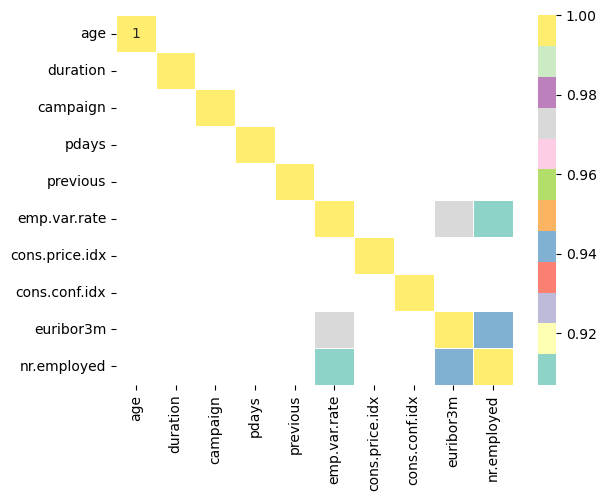

In [22]:
corr = corr[abs(corr) >= 0.90]
sns.heatmap(corr,annot = True,cmap='Set3',linewidths=0.4)
plt.show()

In [23]:
high_corr_columns = ['emp.var.rate','euribor3m','nr.employed']

In [24]:
df1  = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [25]:
df.drop(high_corr_columns,inplace = True,axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [26]:
df1.shape

(41176, 21)

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [28]:
df_encoded['deposit'].value_counts()

deposit
0    36537
1     4639
Name: count, dtype: int64

In [29]:
x = df_encoded.drop('deposit',axis=1)
y = df_encoded['deposit']

print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41176, 20)
(41176,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(30882, 20)
(10294, 20)
(30882,)
(10294,)


In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split =14)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=14)

In [33]:
mscore(dt)

Training Score 0.91059516870669
Testing Score 0.9123761414416165


In [34]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 0 ... 0 0 0]


In [35]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9123761414416165
Confusion Matrix
 [[8915  218]
 [ 684  477]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      9133
           1       0.69      0.41      0.51      1161

    accuracy                           0.91     10294
   macro avg       0.81      0.69      0.73     10294
weighted avg       0.90      0.91      0.90     10294



In [36]:
from sklearn.tree import plot_tree

In [37]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']


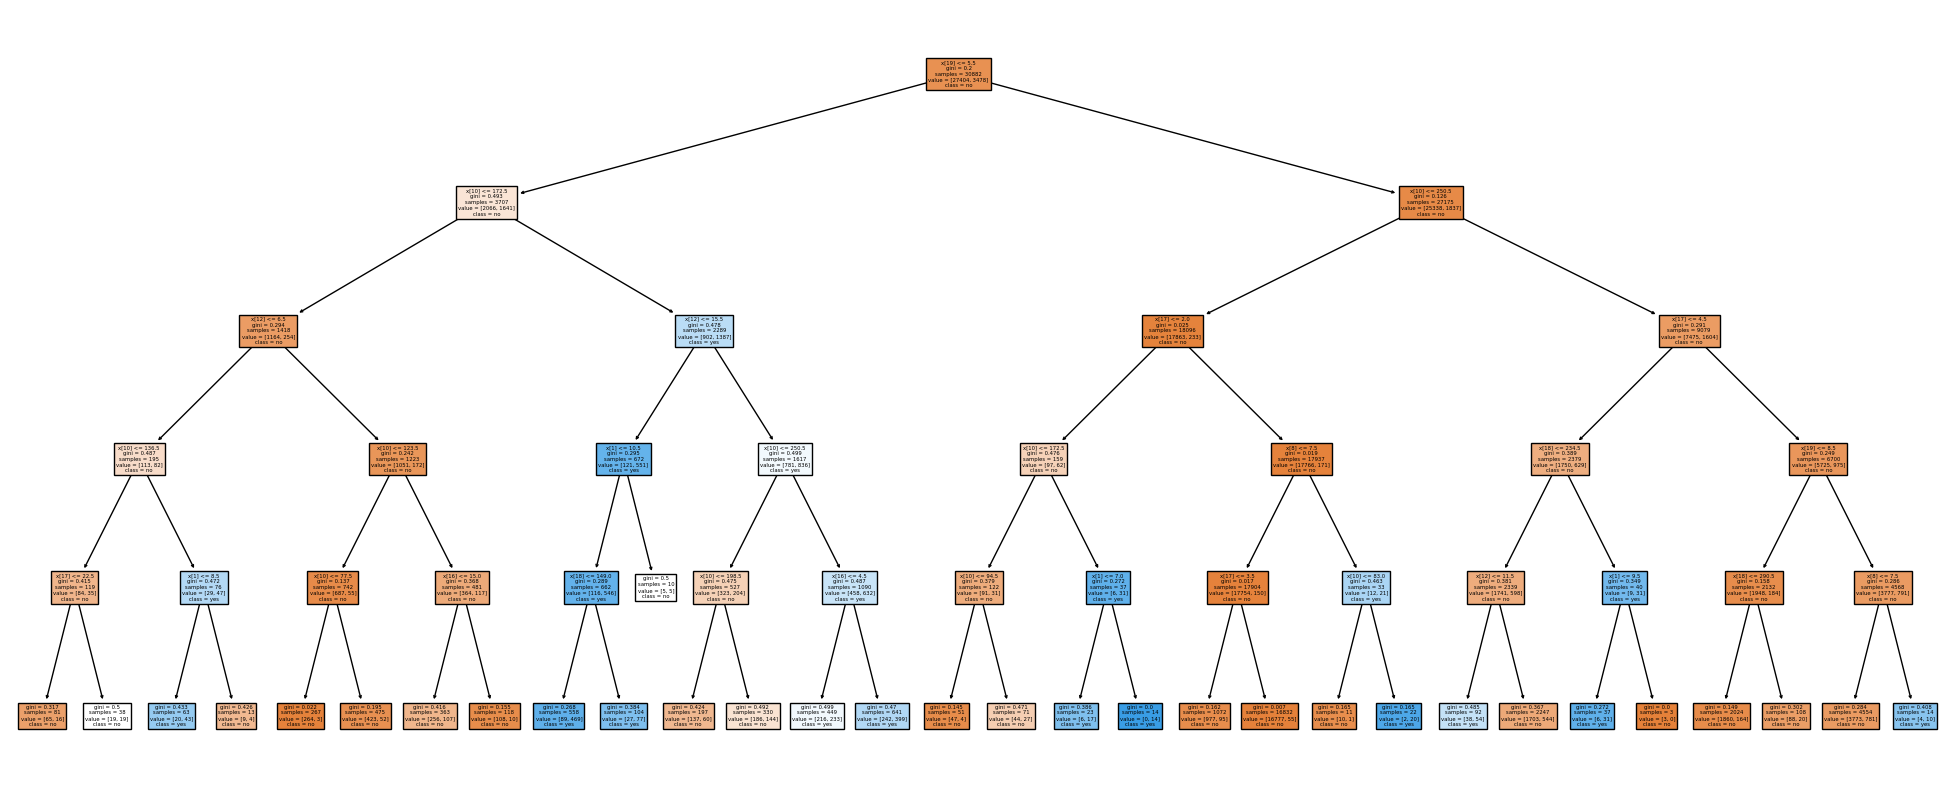

In [38]:
plt.figure(figsize=(25,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [39]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [40]:
mscore(dt1)

Training Score 0.9076808496859011
Testing Score 0.9098503982902661


In [41]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)



Accuracy_Score 0.9098503982902661
Confusion Matrix
 [[8933  200]
 [ 728  433]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9133
           1       0.68      0.37      0.48      1161

    accuracy                           0.91     10294
   macro avg       0.80      0.68      0.72     10294
weighted avg       0.90      0.91      0.90     10294



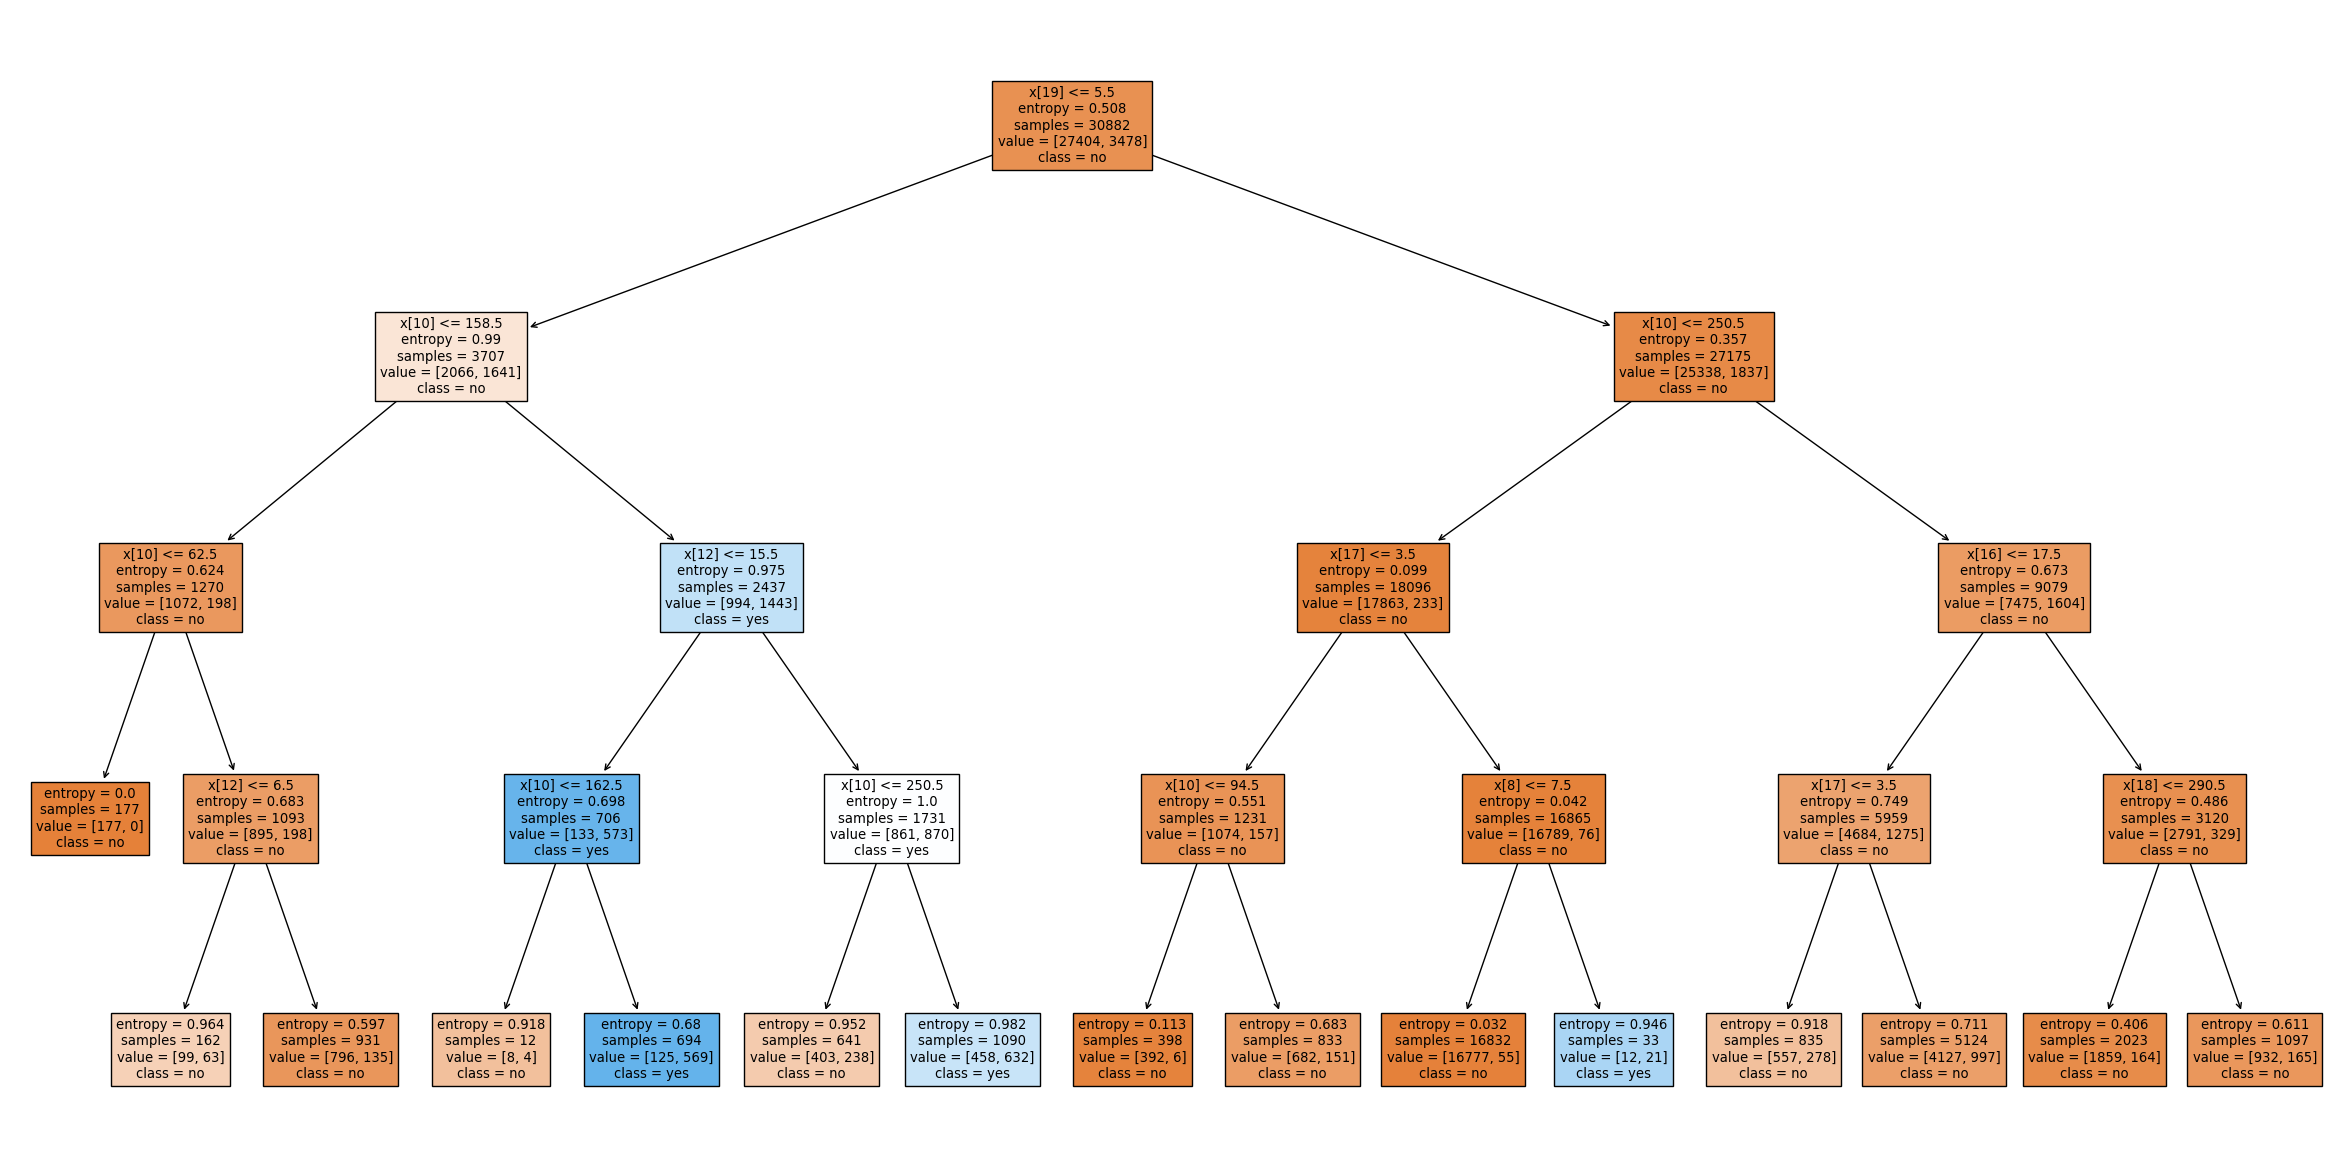

In [42]:
plt.figure(figsize=(30,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()